# Sieci - analiza i modelowanie

## Wstęp

Spojrzenie na dane przez pryzmat sieci pozwala na odnalezienie do tej pory niezauważalnych właściwości, których wykorzystanie może doprowadzić do pozyskania nowej wiedzy. W praktyce okazuje się, że wiele danych pozornie nieusieciowionych pozwala jednak tę sieciowość odnaleźć i dany problem możemy umiejscowić w domenie nauki o sieciach.

W ramach tego tutoriala nauczymy się pracować z sieciami złożonymi różnych rodzajów (statyczne i temporalne), zarówno patrząc przez pryzmat modeli jak i danych.

## Narzędzia
Niniejszy tutorial zrealizowany jest w języku R. Przed przystąpieniem do instalacji pakietu należy zainstalować [R](https://cran.r-project.org) i [RStudio](https://www.rstudio.com). W kolejnym kroku instalujemy pakiet [igraph](https://igraph.org).

In [1]:
if (!require('igraph')) {
    install.packages('igraph')
    library('igraph')
}

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




## Model sieci losowej
Na początku tutoriala zajmiemy się pracą z sieciami statycznymi. 
Jednym z pierwszych modeli, który rozpatrujemy do analizy, jest model sieci losowej, tzw. model Erdős–Rényi, którego właściwości badali Paul Erdos i Alfréd Renyi. Duża część ich wyników została opublikowana w [tej pracy](https://static.renyi.hu/~p_erdos/1960-10.pdf). Model określa liczbę węzłów oraz prawdopodobieństwo połączenia nowego węzła z każdym innym węzłem do tej pory istniejącym w sieci (przy czym losowanie odbywa się co krawędź).

Stwórzmy sieć o dwudziestu pięciu węzłach i prawdopodobieństwie 0.25:

In [2]:
g <- erdos.renyi.game(p.or.m=0.25, n=25)

Możemy teraz sprawdzić właściwości tej sieci poprzez użycie funkcji `summary`:

In [3]:
summary(g)

IGRAPH d8a3d62 U--- 25 83 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)


Podsumowanie grafu pokazuje, że obiekt stworzono z wykorzystaniem biblioteki `igraph`, następnie widzimy jego identyfikator oraz cztery pola wskazujące atrybuty sieci (obecnie oznaczone jako (`U---`). Interpretacja poszczególnych wartości w tym polu jest następująca:
- pierwsza wartość: D/U - graf skierowany (`D` od directed) lub nieskierowany (`U` od undirected)
- druga wartość: N/U - wierzchołki nazwane (`N` od named) lub nienazwane (`U` od unnamed)
- trzecia wartość: W/U - krawędzie ważone (`W` od weighted) lub nieważone (`U` od unweighted)
- czwarta wartość: B/no-type vertices - wierzchołki z typem (`B` od bipartite) (`no-type` od bez typu) - używane najczęściej przy grafach dwudzielnych

Widzimy też, że graf ma 25 wierzchołków i 75 krawędzi. Przy czym druga wartość może się zmieniać co wywołanie, ponieważ zależy od wartości losowych (przy czym prawdopodobieństwo istnienia krawędzi wynosi 0.25).

Teraz możemy sobie taki graf przedstawić na rysunku poprzez użycie funkcji `plot`:

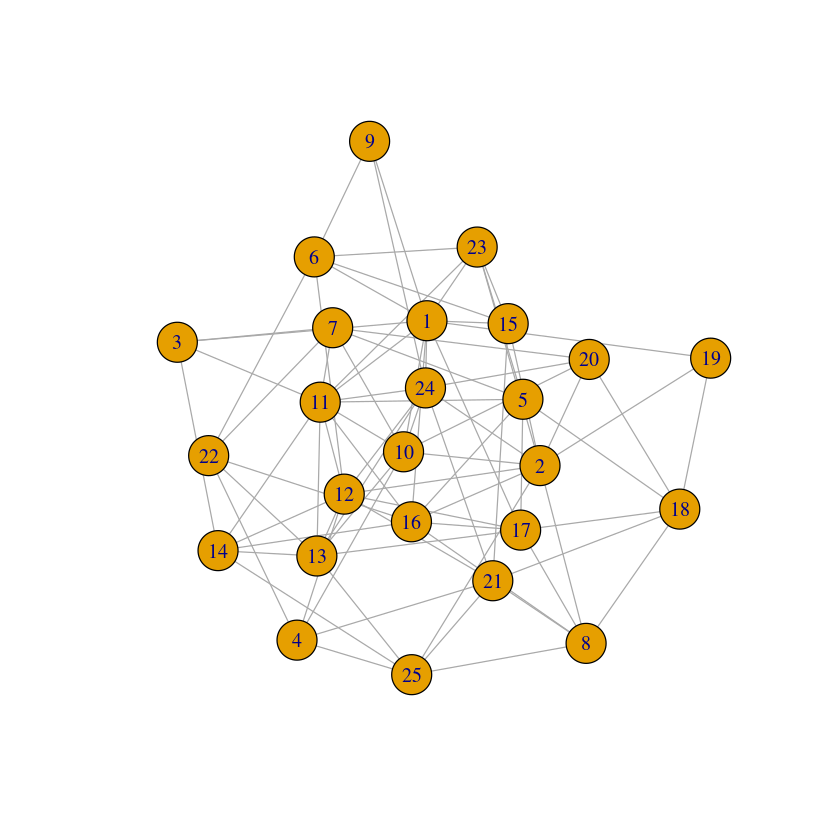

In [4]:
plot(g)

## Ustalanie wag krawędzi
Jak już wiemy, powyższy graf jest bez wag na krawędziach. Spróbujmy je nadać, ale najpierw trzeba poznać dwie przydatne funkcje pakietu igraph:
- `V(g)` - uzyskujemy dostęp do wierzchołków grafu
- `E(g)` - uzyskujemy dostęp do krawędzi grafu

Zobaczmy więc listę krawędzi naszego grafu `g`:

In [5]:
E(g)

+ 83/83 edges from d8a3d62:
 [1]  1-- 3  1-- 6  3-- 7  5-- 7  2-- 8  1-- 9  6-- 9  1--10  2--10  4--10
[11]  7--10  1--11  3--11  5--11  7--11 10--11  2--12  4--12  6--12 11--12
[21] 10--13 11--13 12--13  3--14 11--14 12--14 13--14  1--15  2--15  6--15
[31]  1--16  2--16  5--16  8--16 11--16 14--16  1--17  5--17  8--17 12--17
[41] 13--17 16--17  5--18  8--18 17--18  1--19  2--19 18--19  2--20  7--20
[51] 10--20 18--20  4--21  8--21 12--21 15--21 18--21  4--22  6--22  7--22
[61] 13--22 16--22  1--23  2--23  5--23  6--23 11--23 15--23  1--24  2--24
[71]  9--24 10--24 11--24 12--24 13--24 20--24 21--24  2--25  4--25  8--25
[81] 13--25 14--25 21--25

Następnie nadajmy wagi krawędziom w taki sposób, że każdej krawędzi uzyskanej z funkcji `E(g)` przypiszemy liczbę losową z zakresu [0,1]:

In [6]:
E(g)$weight <- runif(length(E(g)), 0.01, 1)

Możemy teraz porównać wynik `summary(g)` z poprzednim i przekonać się, że doszedł nowy atrybut: waga krawędzi (trzecie pole):

In [7]:
summary(g)

IGRAPH d8a3d62 U-W- 25 83 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n), weight (e/n)


Spróbujmy wyrysować sobie nasz graf, ale z założeniem, że będzie on w layoucie koła oraz atrybut szerokości krawędzi powiążemy z wagą krawędzi:

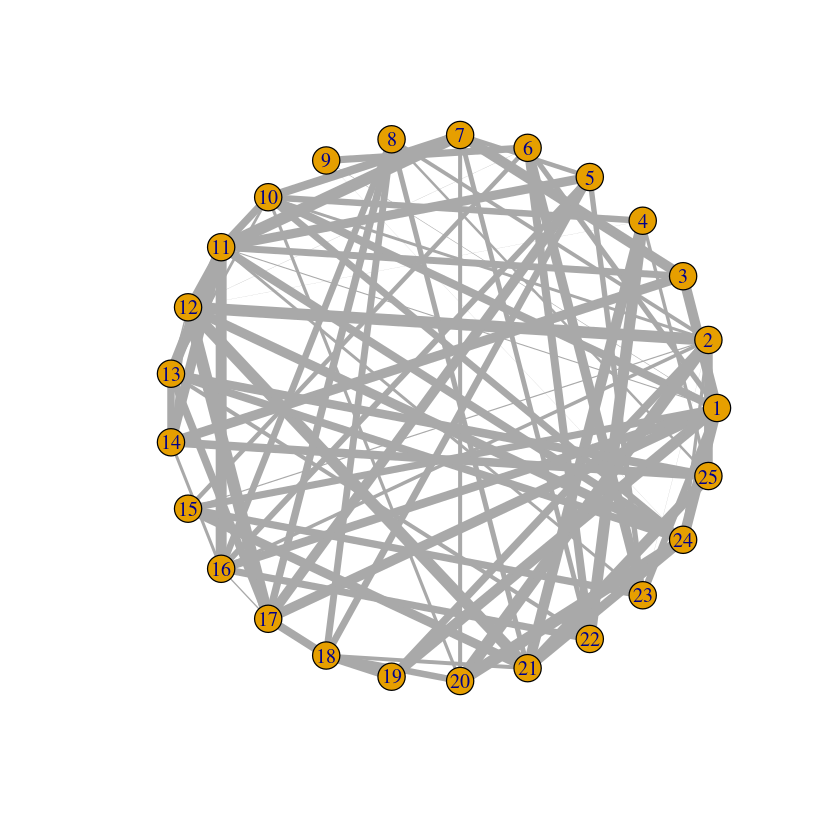

In [8]:
plot(g, edge.width=E(g)$weight*10, vertex.size=10, layout=layout.circle(g))

## Miary w grafach
W kolejnym kroku zapoznamy się z podstawowymi miarami węzłów, takimi jak np. stopień węzła (degree), betweeenness czy closeness. W pierwszej kolejności sprawdźmy jaki jest stopień wierzchołków:

In [9]:
degree(g)

[1] 11 10  4  5  6  6  6  6  3  8 11  9  8  6  5  8  7  6  3  5  7  5  6  9  6

Widzimy wylistowane stopnie wierzchołków, ale wygodniej byłoby to zagregować w postaci histogramu, do czego służy funkcja `hist`:

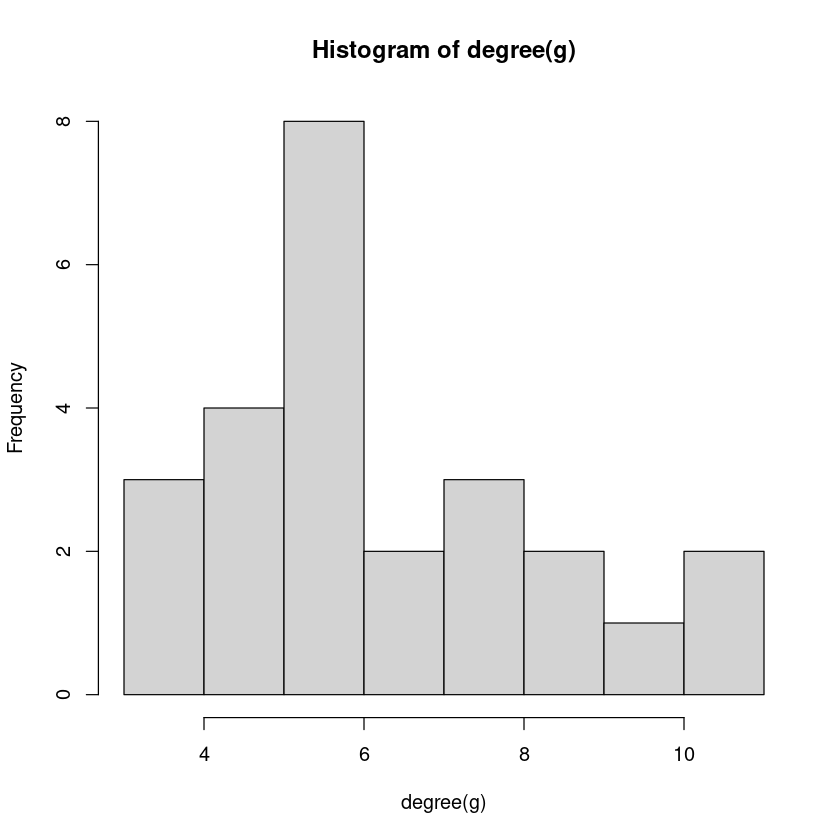

In [10]:
hist(degree(g))

Po grafie losowym tego typu można by się spodziewać nieco innego rozkładu stopni węzłów (bliższego normalnemu), ale graf jest zbyt mały, aby statystycznie ujawnić tę własność. Wobec tego spróbujmy z większym grafem:

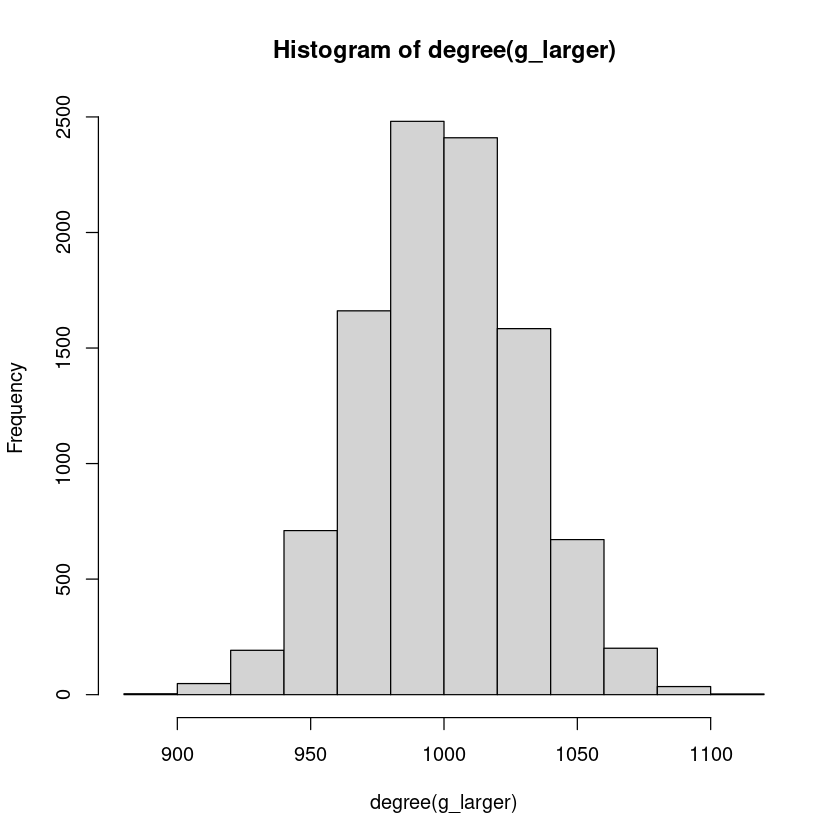

In [11]:
g_larger <- erdos.renyi.game(p.or.m=0.1, n=10000)
hist(degree(g_larger))

Widzimy już, że faktycznie stopień węzła ma rozkład normalny.

Warto także przyjrzeć się mniej lokalnej mierze wierzchołków, tzw. betweenness, która opisuje jak centralny jest węzeł względem całej sieci. Jej obliczenie sprowadza się do obliczenia wszystkich najkrótszych ścieżek w grafie a następnie policzeniu ile z nich przebiega przez analizowany węzeł względem wszystkich najkrótszych ścieżek. Można więc przypuszczać, że jest to zadanie obliczeniowo złożone, stąd wracamy do naszego małego grafu `g` zamiast liczyć to na `g_larger`:

In [12]:
betweenness(g)

[1] 20 94  0 24  8 30  8 21 20 25 14 71 31 15 12 23  2  5  0  7  3  6 34 23  9

Istotną miarą jest też średnica grafu, tj. najdłuższa najkrótsza ścieżka. Aby nie liczyć jej z uwzględnieniem wag, ustawiamy opcję `weights` na `NA`:

In [13]:
diameter(g, weights=NA)

[1] 3

## Komponenty grafu
Sprawdźmy jakie komponenty są w grafie, ale nieco rzadszym, aby było ich kilka:

In [14]:
g_smallprob <-erdos.renyi.game(50, 0.02)
cl <- clusters(g_smallprob)


Wyrysujmy graf, ale kolorując wierzchołki przynależnością do komponentów:

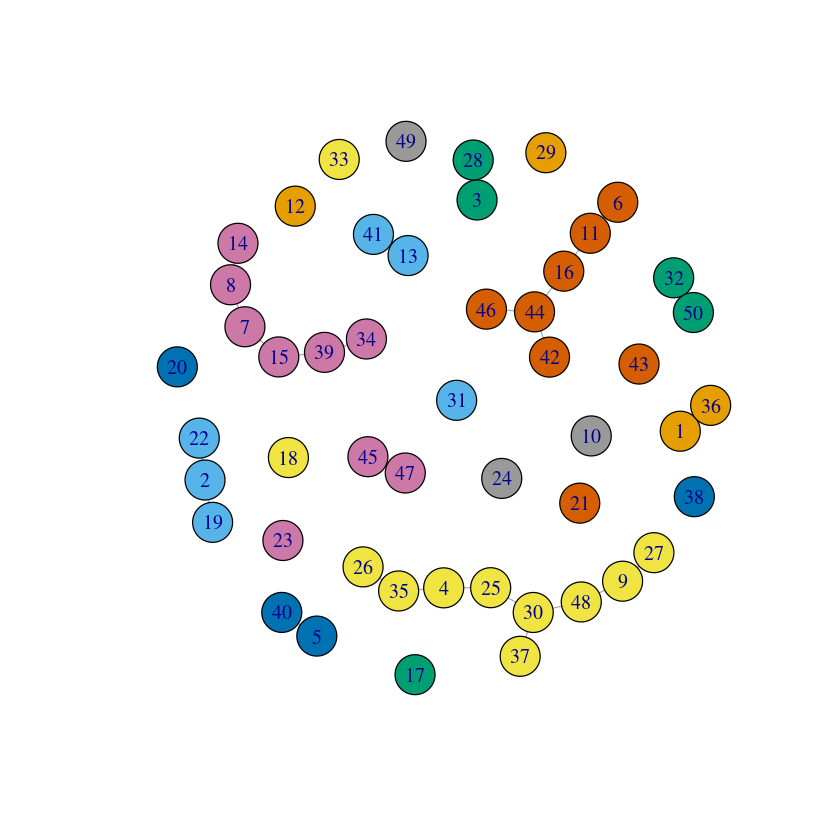

In [15]:
plot(g_smallprob, vertex.color=cl$membership)

## Model dołączania preferencyjnego

Kolejnym istotnym modelem grafów jest model dołączania preferencyjnego, tzw. Barabási–Albert model. Określa on, że dołączające do sieci węzły raczej połączą się z węzłami, które już są dobrze połączone zamiast ze słabo połączonymi (choć nie jest to wykluczone). Stwórzmy sieć wedle tego modelu, gdzie będzie tysiąc węzłów:

In [16]:
g <- barabasi.game(1000)

Teraz spróbujmy ją wyplotować:

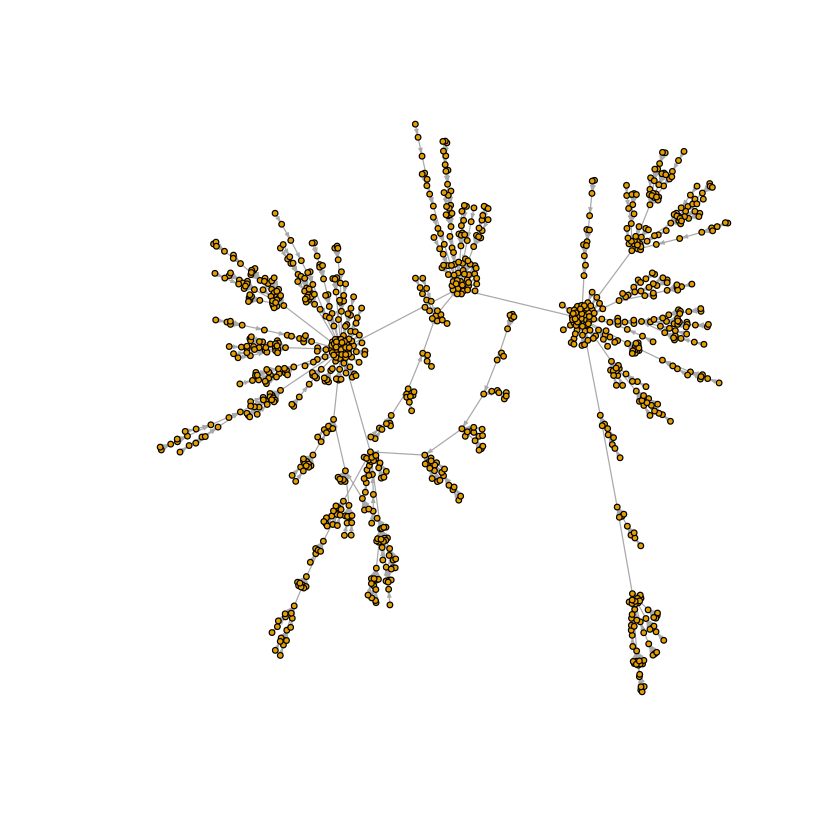

In [17]:
layout <- layout.fruchterman.reingold(g)
plot(g, layout=layout, vertex.size=2,
     vertex.label=NA, edge.arrow.size=.2)

Jak widać, jej wygląd jest radykalnie inny od modelu losowego. Tego typu sieci cechuje tzw. prawo potęgowe (power-law), inaczej nazywane bezskalowością. W tego typu sieci, jeśli wyplotujemy histogram stopni węzła i wielu innych miar sieciowych, powinniśmy uzyskać taką jego postać, gdzie jest bardzo dużo węzłów z niską wartością miary i tylko kilka z bardzo wysoką. Istotnym współczynnikiem, który mówi o modelu BA jest współczynnik alfa, który można obliczyć poprzez dopasowanie do modelu potęgowego:

In [18]:
d <- degree(g)
fit1 <- igraph::fit_power_law(d+1)
print(paste("Alpha =", round(fit1$alpha, 3)))

[1] "Alpha = 3.21"


## Praca z rzeczywistym zbiorem danych
Do tej pory pracowaliśmy z modelami sieci. Spróbujmy pracować z rzeczywistym zbiorem danych, tj. takim, który posiada informacje o aktywnościach pozyskane z rzeczywistych interakcji między użytkownikami. Posłużymy się korespondencją z firmy produkcyjnej opublikowanym na Harvard Dataverse ([tutaj](https://doi.org/10.7910/DVN/6Z3CGX)) a pochodzącym z pracy [1].

[1] Nurek, Mateusz, and Radosław Michalski. "Combining Machine Learning and Social Network Analysis to Reveal the Organizational Structures." Applied Sciences 10, no. 5 (2020): 1699. doi: [10.3390/app10051699](https://dx.doi.org/10.3390/app10051699).

Zbiór umieszczono jako plik `out.radoslaw_email_email`. Na początku załadujmy go jako data frame, gdzie pozostawiamy tylko identyfikatory węzłów (pomijamy timestampy). Wyświetlamy też liczbę załadowanych wierszy:

In [19]:
dfGraph <- read.csv2("data/out.radoslaw_email_email", skip=2, sep= " ")[, 1:2]

nrow(dfGraph)

[1] 82926

Następnie budujemy z tych wierszy graf, usuwamy pętle i zduplikowane krawędzie:

In [20]:
g <- graph.data.frame(dfGraph, directed = F)
g <- simplify(g)
summary(g)

IGRAPH 32f01ad UN-- 167 3250 -- 
+ attr: name (v/c)


Kończąc demonstrację pracy z rzeczywistym zbiorem, wyplotujmy graf kolorując węzły przynależnością do grupy, tj. zbioru bardziej powiązanych ze sobą węzłów niż z innymi węzłami (metoda krótkich ścieżek losowych [2]):

[2] Pascal Pons, Matthieu Latapy: Computing communities in large networks using random walks, https://arxiv.org/abs/physics/0512106 

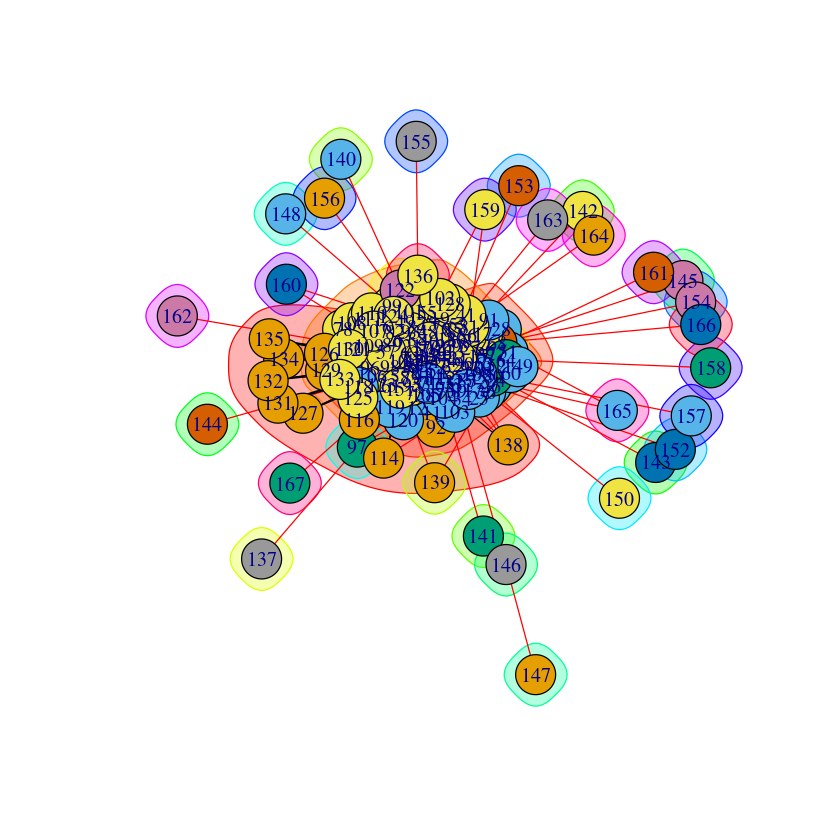

In [21]:
walktrap <- cluster_walktrap(g)
plot(walktrap, g)

## Modelowanie i analiza sieci temporalnych
Kolejnym krokiem w analizie sieci złożonych może być odejście od sieci statycznych i skierowanie się ku sieciom temporalnym, tzn. takim, w których aspekt czasu jest istotny. W celu zrozumienia podstawowych konceptów tych sieci, polecamy zapoznać się z pracą [3].

Modelowanie i praca z sieciami temporalnymi jest nieco bardziej złożone, gdyż wymaga ustalenia jakiego modelu używamy, jak liczyć miary (miary temporalne są mniej ustalone niż statyczne) i wyniki wnioskowania są bardziej złożone w interpretacji. Jednak warto poświęcić ten trud aby nie pominąć bardzo istotnego czynnika analiz jakim jest czas. Kolejność zdarzeń jest szczególnie przydatna w procesach dynamicznych w sieciach, przykładowo w dyfuzji informacji i pokrewnych.

Jednym z pakietów, który warto wykorzystać do analizy sieci temporalnych, jest ndtv. Zainstalujmy go więc.

[3] Holme, P., & Saramäki, J. (2012). Temporal networks. Physics reports, 519(3), 97-125.

In [2]:
if (!require('ndtv')) {
    install.packages('ndtv')
    library('ndtv')
}

Loading required package: ndtv

Loading required package: network


‘network’ 1.18.1 (2023-01-24), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attaching package: ‘network’


The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


Loading required package: networkDynamic


‘networkDynamic’ 0.11.2 (2022-05-04), part of the Statnet Project
* ‘news(package="networkDynamic")’ for changes since last version
* ‘citation("networkDynamic")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


Loading required package: animation

Loading required packag

Jednym z komponentów biblioteki `ndtv` jest pakiet `networkDynamic`, w którym znajduje się zbiór `windsurfers`, którego użyjemy do analiz sieci temporalnej:

In [23]:
data(windsurfers)
head(as.data.frame(windsurfers))

,onset,terminus,tail,head,onset.censored,terminus.censored,duration,edge.id
,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>
1,0,1,4,1,FALSE,FALSE,1,1
2,2,3,4,1,FALSE,FALSE,1,1
3,7,8,4,1,FALSE,FALSE,1,1
4,9,14,4,1,FALSE,FALSE,5,1
5,17,18,4,1,FALSE,FALSE,1,1
6,19,24,4,1,FALSE,FALSE,5,1


W pierwszej kolejności zrozummy co zawierają poszczególne kolumny:

- onset: początek krawędzi (czas)
- terminus: koniec krawędzi (czas)
- tail: węzeł, z którego wychodzi krawędź
- head: węzeł, do którego dochodzi krawędź
- duration: czas trwania (czyli terminus minus onset)

Jest to więc tzw. interval graph, gdzie krawędzie opisane są czasem trwania, nie zaś momentem wystąpienia (szczegóły w pracy [2]).

Możemy teraz wyplotować sobie ten graf, ale traktując go jako statyczny:

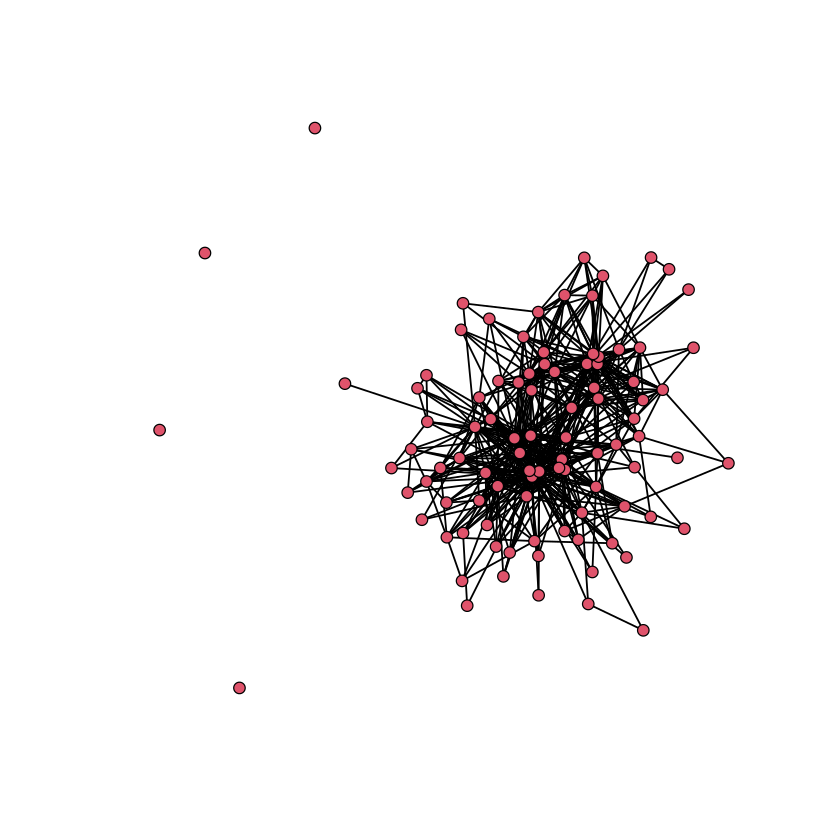

In [24]:
plot(windsurfers)

Jest to jednak mało pomocne, gdy chcemy pracować z dynamiką sieci. Możemy więc zerknąć jak wygląda sieć w wybranym momencie:

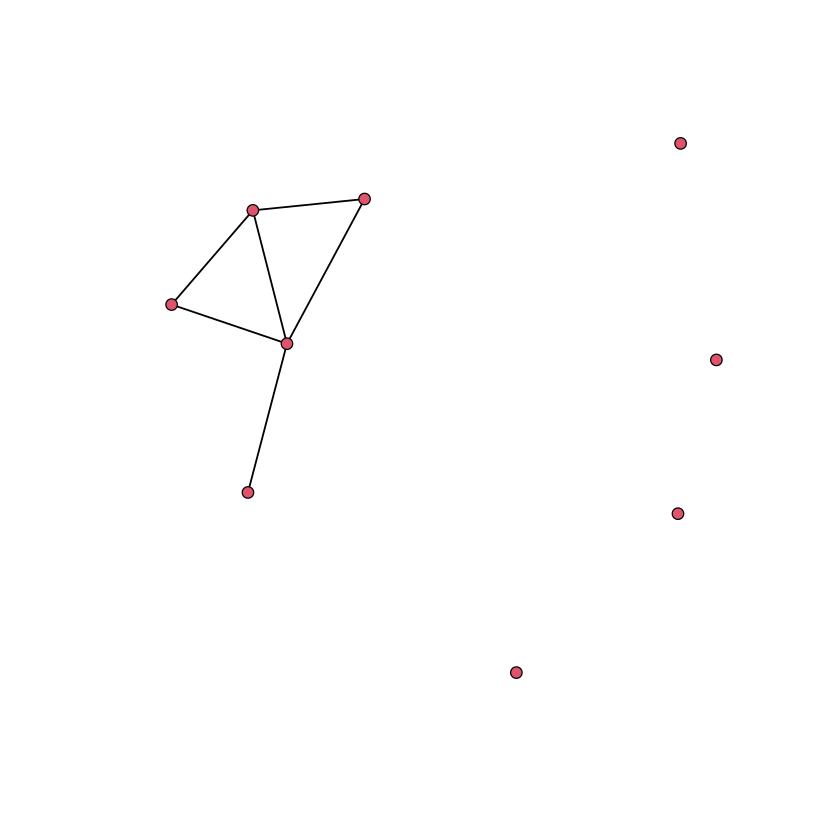

In [25]:
plot(network.extract(windsurfers,at=12))

Jeśli zaś chcielibyśmy zobaczyć jak wygląda graf w pewnym oknie czasowym, możemy użyć nieco innego podejścia:

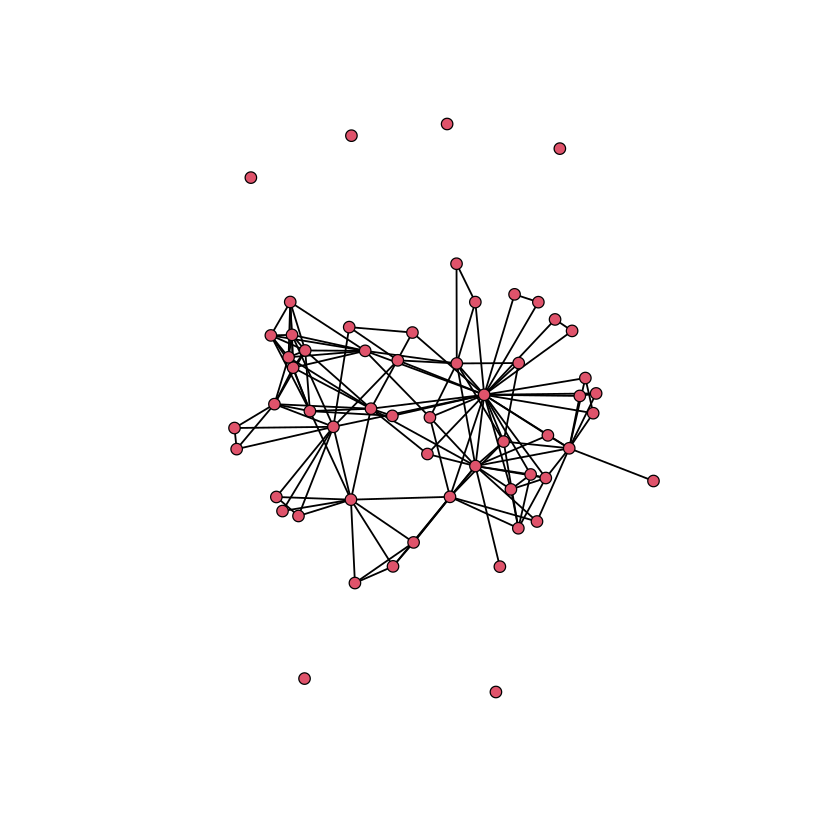

In [26]:
plot(network.extract(windsurfers,onset=0,terminus=7,rule = "any"))

W ten sposób obejmiemy krawędzie, które "zahaczają" o to okno czasowe. Jeśli zaś interesuje nas sieć, która składa się tylko z krawędzi, które wpadają w dane okno, możemy użyć innego wariantu `network.extract`:

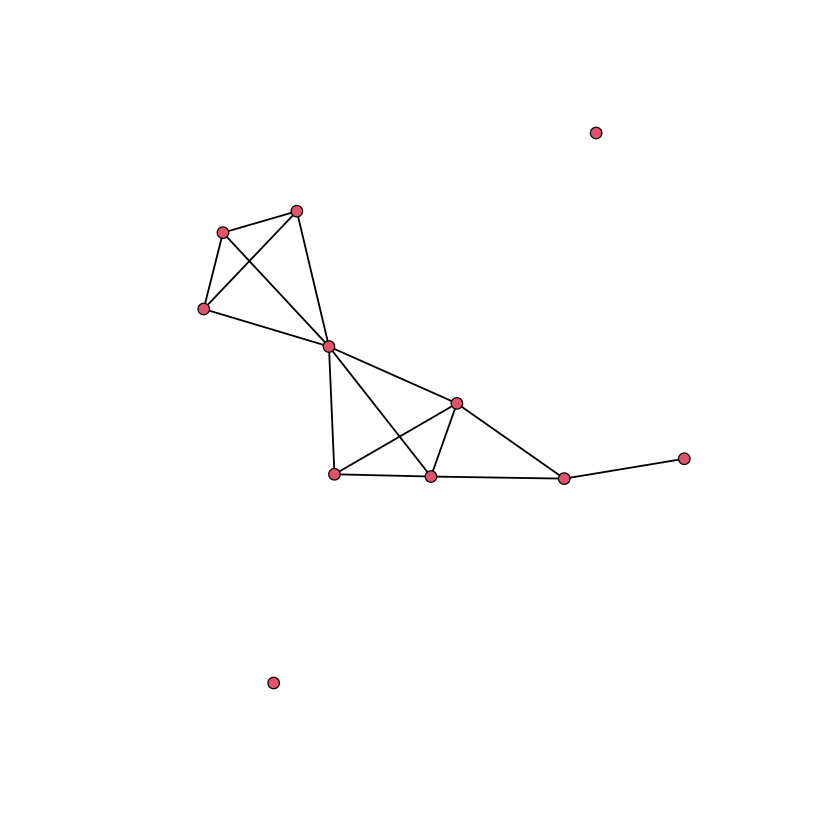

In [27]:
plot(network.extract(windsurfers,onset=0,terminus=1,rule = "all"))

Pakiet `ndtv` pozwala też na wygodne wyświetlenie ewolucji sieci, zdecydowanie bardziej wygodne niż korzystanie z pojedynczych klatek `plot`. Warto sprawdzić lokalnie jak zachowa się następujące polecenie:

``render.d3movie(windsurfers,displaylabels=TRUE,output.mode = "htmlWidget")``

Następnie przejdźmy do analizy numerycznej, która może być dobrym sposobem zrozumienia formowania się krawędzi, które następnie możemy wykorzystać do predykcji. Tu posłuży nam biblioteka `tsna`:

In [28]:
if (!require('tsna')) {
    install.packages('tsna')
    library('tsna')
}

Loading required package: tsna



Zobaczmy jak formują się krawędzie w czasie dla interwału jednej jednostki czasu:

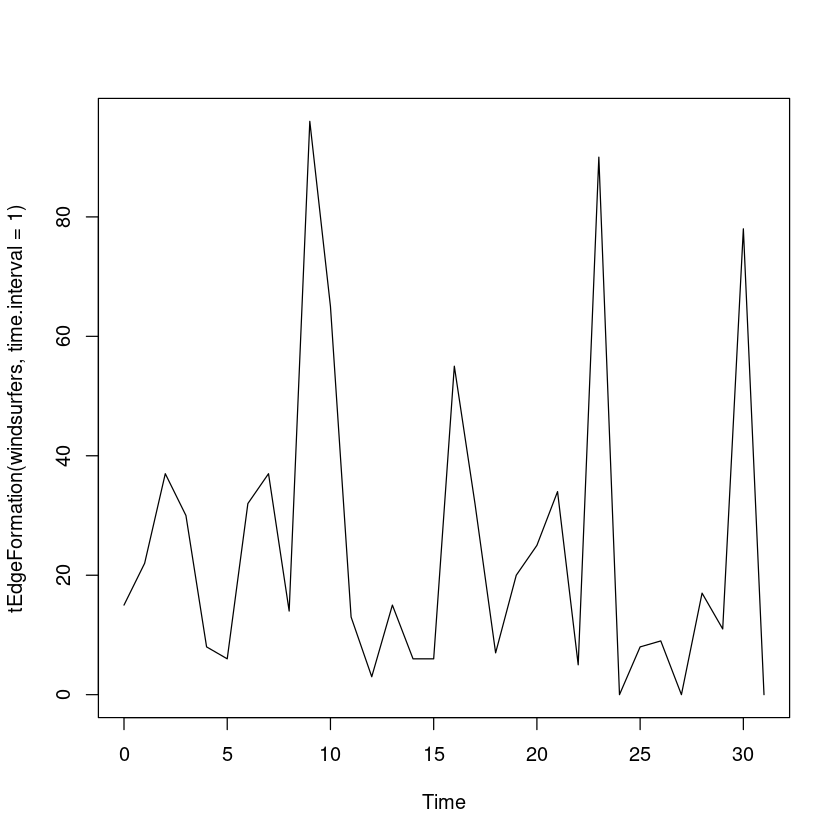

In [29]:
plot(tEdgeFormation(windsurfers, time.interval = 1))

Jak widać, dynamika sieci jest typowo skokowa (ang. bursty). Teraz możemy spróbować spróbować wyliczyć temporalny betweenness:

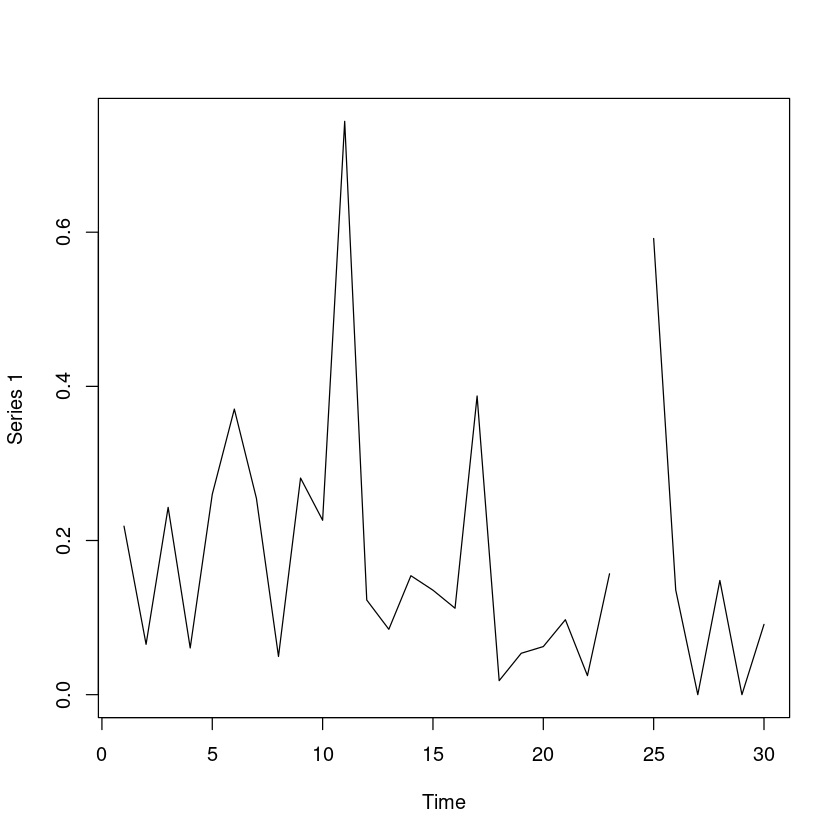

In [30]:
temporalBetweenness <- tSnaStats(windsurfers,
  snafun = "centralization",
  start = 1,
  end = 30,
  time.interval = 1,
  aggregate.dur = 0,
  FUN = "betweenness"
)
plot(temporalBetweenness)

Pamiętajmy jednak, że jest on policzony dla całej sieci, więc aby dokonywać predykcji na lokalnym poziomie musielibyśmy go liczyć dla węzłów.

## Polecane materiały

Oprócz prac przytoczonych w tym tutorialu, polecamy następujący poradnik dotyczący pracy z sieciami złożonymi:
https://kateto.net/network-visualization